# Part II - (Loan Data from Prosper)
## by (Adewale Yusuff Adeleke)


## Investigation Overview


> For the presentation, my focus is on the cummulative effect of interest rate and owning a house on the loan payment. The categorical variables  IsBorrowerHomeowner and LoanStatus  are plotted on Facetting box against BorrowerRate on y axis. figsize of 4 where used for clarity sake.
            The chart in the middle (Completed) shows that borrowers tends to complete their payment more when they own house, as compared to when they do not, and the interest rate is relatively low compared to the two other charts.
 


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Data tidiness are done, as there are few variables with unmatched dtypes, and Year was extracted from 'ListingCreationDate' and 'ClosedDate'so as to be able to effectively run numetrical functions. Some rows where dropped as a result of incomplete data and null values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData_clean.csv')
df.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,...,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,Investors
0,0F483544120452347F48121,2012,36,Defaulted,2012,0.35797,0.3177,5,13,FL,...,121,True,700,719,"$50,000-74,999",True,5500,4000,0,10
1,101B35764008108187B2EBA,2013,36,Defaulted,2013,0.28032,0.2419,5,15,IL,...,3,False,680,699,"$25,000-49,999",True,2500,2000,0,30
2,0F4F3571508214190FD75CB,2013,60,Completed,2013,0.30748,0.2809,3,1,NY,...,25,False,660,679,"$25,000-49,999",True,3886,4000,0,37
3,0F5034867864161084F3789,2010,36,Completed,2013,0.11296,0.0920,9,1,CO,...,10,True,700,719,"$75,000-99,999",True,6667,4000,0,121
4,0F57353904771934596FE9F,2012,36,Completed,2012,0.12782,0.0999,9,20,CA,...,44,False,740,759,"$25,000-49,999",True,3750,10000,0,30


In [3]:
def myCountPlot(df,xVar,hueVar=None,color=sb.color_palette()[0],palette=None,order=None):
    # set plot dimensions
    plt.figure(figsize=[14, 6])
    # plot
    sb.countplot(data=df, x = xVar,hue=hueVar,color=color,palette=palette,order=order,edgecolor='black');
    plt.title(f'''Distribution of {xVar} {'by' if hueVar else ''} {hueVar if hueVar else ''}'''.title(), fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.



It is depicted on the below box plot that the majority of the Completed (Loan Status) plot has a relatively lower interest rate compared to 'Default' and 'Chargeoff'. This shows that majority of the borrowers tends to pay up on time when the interest rate is minimal.

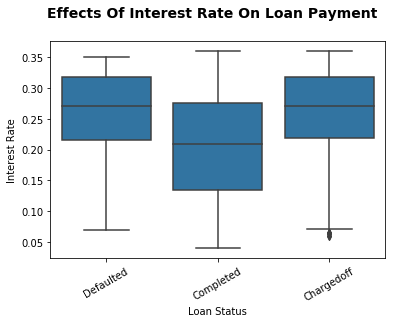

In [4]:
# plot Box plot
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='LoanStatus', y='BorrowerRate', color=base_color)
plt.xticks(rotation=30);
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.suptitle('Effects of Interest Rate on Loan Payment'.title(), y = 1, fontsize = 14, weight = 'bold');


> The chart bellow shows that majority of the employed borrowers pay up and their loans. This confirms that employement status actually has influence on loan payment.

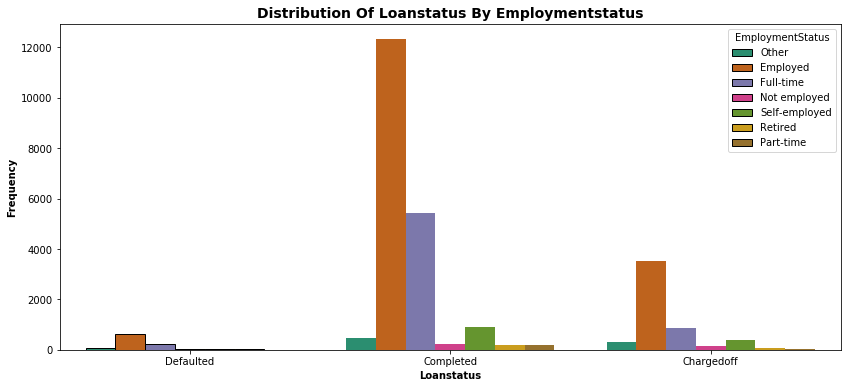

In [5]:
# call plot function
myCountPlot(df,'LoanStatus', hueVar = 'EmploymentStatus', palette = 'Dark2' );


The clustered bar chart below shows that a relatively higher amount of house owners completed their loan repayment compared to those that are not home owners.

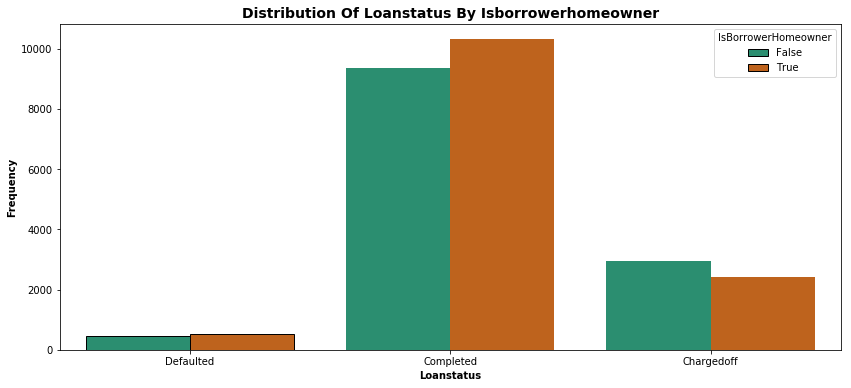

In [6]:
# call plot function
myCountPlot(df,'LoanStatus', hueVar = 'IsBorrowerHomeowner', palette = 'Dark2' );


As it was deduced from my bivariate explorations above that high interest rate and not owning a house have adverse effects on loan payments, the above multivariate explorattion further affirmed the assertions. The chart in the middle (Completed) shows that borrowers tends to complete their payment more when they own house, as compared to when they do not, and the interest rate is relatively low compared to the two other charts.


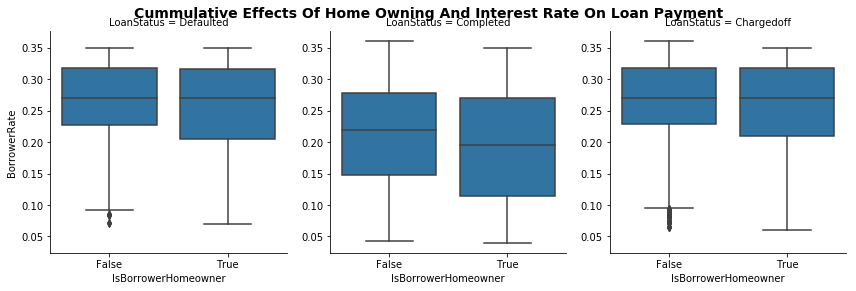

In [7]:
# plot box plot
g = sb.FacetGrid(data = df, col = 'LoanStatus', size = 4)
g.map(sb.boxplot, 'IsBorrowerHomeowner', 'BorrowerRate')
plt.suptitle('Cummulative Effects of Home owning and Interest Rate on Loan Payment'.title(), y = 1, fontsize = 14, weight = 'bold');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 283390 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
